# clip-05s.jl

Load Julia packages (libraries) needed

In [1]:
using StatisticalRethinking, CmdStan
gr(size=(500,800));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "03")
cd(ProjDir)

Define the Stan language model

In [3]:
binomialstanmodel = "
// Inferring a Rate
data {
  int N;
  int<lower=0> k[N];
  int<lower=1> n[N];
}
parameters {
  real<lower=0,upper=1> theta;
  real<lower=0,upper=1> thetaprior;
}
model {
  // Prior Distribution for Rate Theta
  theta ~ beta(1, 1);
  thetaprior ~ beta(1, 1);

  // Observed Counts
  k ~ binomial(n, theta);
}
";

Define the Stanmodel and set the output format to :mcmcchains.

In [4]:
stanmodel = Stanmodel(name="binomial", monitors = ["theta"], model=binomialstanmodel,
  output_format=:mcmcchains);
# Use 16 observations
N2 = 4^2
d = Binomial(9, 0.66)
n2 = Int.(9 * ones(Int, N2))
k2 = rand(d, N2);


File /Users/rob/.julia/dev/StatisticalRethinking/scripts/03/tmp/binomial.stan will be updated.



Input data for cmdstan

In [5]:
binomialdata = Dict("N" => length(n2), "n" => n2, "k" => k2);

Sample using cmdstan

In [6]:
rc, chn, cnames = stan(stanmodel, binomialdata, ProjDir, diagnostics=false,
  CmdStanDir=CMDSTAN_HOME);
# Describe the draws
describe(chn)


Inference for Stan model: binomial_model
4 chains: each with iter=(1000,1000,1000,1000); warmup=(0,0,0,0); thin=(1,1,1,1); 4000 iterations saved.

Warmup took (0.028, 0.031, 0.026, 0.029) seconds, 0.11 seconds total
Sampling took (0.049, 0.046, 0.040, 0.037) seconds, 0.17 seconds total

                Mean     MCSE  StdDev     5%   50%   95%  N_Eff  N_Eff/s    R_hat
lp__             -87  2.7e-02     1.1    -89   -87   -86   1696     9901  1.0e+00
accept_stat__   0.91  1.8e-03    0.13   0.64  0.96   1.0   4649    27141  1.0e+00
stepsize__      0.83  3.5e-02   0.049   0.75  0.84  0.89    2.0       12  6.5e+13
treedepth__      2.0  5.0e-02    0.70    1.0   2.0   3.0    192     1118  1.0e+00
n_leapfrog__     4.9  3.9e-01     7.3    1.0   3.0    15    358     2087  1.0e+00
divergent__     0.00      nan    0.00   0.00  0.00  0.00    nan      nan      nan
energy__          88  3.8e-02     1.5     86    88    91   1577     9207  1.0e+00
theta           0.73  6.5e-04   0.036   0.67  0.73  0.7

2-element Array{ChainDataFrame,1}

Summary Statistics
. Omitted printing of 1 columns
│ Row │ parameters │ mean    │ std       │ naive_se    │ mcse        │ ess     │
│     │ Symbol     │ Float64 │ Float64   │ Float64     │ Float64     │ Any     │
├─────┼────────────┼─────────┼───────────┼─────────────┼─────────────┼─────────┤
│ 1   │ theta      │ 0.73213 │ 0.0363336 │ 0.000574484 │ 0.000630393 │ 3169.97 │

Quantiles

│ Row │ parameters │ 2.5%     │ 25.0%    │ 50.0%    │ 75.0%    │ 97.5%    │
│     │ Symbol     │ Float64  │ Float64  │ Float64  │ Float64  │ Float64  │
├─────┼────────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ 1   │ theta      │ 0.656968 │ 0.708304 │ 0.732636 │ 0.757544 │ 0.800322 │


Plot the 4 chains

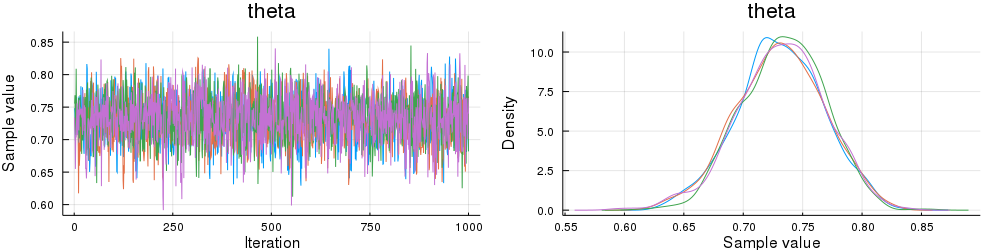

In [7]:
if rc == 0
  plot(chn)
end

End of `03/clip-05s.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*